In [2]:
!pip install ipykernel

     |████████████████████████████████| 122kB 874kB/s eta 0:00:01
     |████████████████████████████████| 788kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 501kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 81kB 756kB/s eta 0:00:01
     |████████████████████████████████| 112kB 233kB/s eta 0:00:01
     |████████████████████████████████| 61kB 97kB/s eta 0:00:011
     |████████████████████████████████| 921kB 664kB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 574kB/s eta 0:00:01
     |████████████████████████████████| 358kB 719kB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 462kB/s eta 0:00:01
     |████████████████████████████████| 92kB 693kB/s eta 0:00:01
     |████████████████████████████████| 112kB 672kB/s eta 0:00:01
  Created wheel for tornado: filename=tornado-6.0.4-cp37-cp37m-linux_x86_64.whl size=429124 sha256=3220389cc956ef7cb54cb59eb68289fb42d82695f387c3ccdcdf6832612d29d7
  Stored in directory: /home/abhisht/.cache/pip

In [48]:
from IPython.display import Image, display

# Defect area calculation

In [101]:

def areaPerc(annotation):
  dict = {"Linear Crack": {"Low": 0, "Medium": 0, "High": 0},
          "Alligator Crack": {"Low": 0, "High": 0}, 
          "Potholes": {"Low": 0, "Medium": 0, "High": 0},
          "Shoulders": {"Low": 0, "Medium": 0, "High": 0}}

  with open(annotation, 'r') as file: # opening file to read from
              lst = []
              lst = file.read().splitlines() 
              lst = list(filter(None, lst)) # list containing all the sentences
              file.close()
  words = []
  for sent in lst:
      words.append(sent.split(' ')) # splitting the sentences into words
  words = list(filter(None, words))

  for box in words:
      w = float(box[3]) 
      h = float(box[4])
      class_num = int(box[0])

      if class_num == 0:
        diam = 0.285 * w * h * 100
        if diam <= 2.41:
          dict["Linear Crack"]["Low"] = dict["Linear Crack"]["Low"] + diam
        elif diam > 2.42 and diam <= 4.80:
          dict["Linear Crack"]["Medium"] = dict["Linear Crack"]["Medium"] + diam
        else:
          dict["Linear Crack"]["High"] = dict["Linear Crack"]["High"] + diam

      elif class_num == 1:
        diam = w * h * 100
        if diam <= 33.5:
          dict["Alligator Crack"]["Low"] = dict["Alligator Crack"]["Low"] + diam
        else:
          dict["Alligator Crack"]["High"] = dict["Alligator Crack"]["High"] + diam

      elif class_num == 2:
        diam = 3.14 / 4 * max(w,h) * max(w,h)* 100
        if diam <= 26: #2.6
          dict["Potholes"]["Low"] = dict["Potholes"]["Low"] + diam
        elif diam > 26 and diam <= 52: #5.2
          dict["Potholes"]["Medium"] = dict["Potholes"]["Medium"] + diam
        else:
          dict["Potholes"]["High"] = dict["Potholes"]["High"] + diam

      elif class_num == 3:
        diam = w * h * 100
        if diam <= 8.3:
          dict["Shoulders"]["Low"] = dict["Shoulders"]["Low"] + diam
        elif diam > 8.3 and diam <= 16.7:
          dict["Shoulders"]["Medium"] = dict["Shoulders"]["Medium"] + diam
        else:
          dict["Shoulders"]["High"] = dict["Shoulders"]["High"] + diam
 
  return dict


# PCI Calculation with Model Error Coefficients

In [102]:
#PCI Calculation funct
def PCICalc(dictn):

  #defining MAEs
  MAE_ModErr = {"Linear Crack": {"Low": 5, "Medium": 5, "High": 10},
          "Alligator Crack": {"Low": 5, "High": 10}, 
          "Potholes": {"Low": 10, "Medium": 7, "High": 10},
          "Shoulders": {"Low": 10, "Medium": 5, "High": 10}}

  #calculating distress indexes
  LCI = 100 - 40*((dictn["Linear Crack"]["Low"]/MAE_ModErr["Linear Crack"]["Low"]) 
  + (dictn["Linear Crack"]["Medium"]/MAE_ModErr["Linear Crack"]["Medium"]) 
  + (dictn["Linear Crack"]["High"]/MAE_ModErr["Linear Crack"]["High"])) 

  ACI = 100 - 40*((dictn["Alligator Crack"]["Low"]/MAE_ModErr["Alligator Crack"]["Low"]) 
  + (dictn["Alligator Crack"]["High"]/MAE_ModErr["Alligator Crack"]["High"])) 

  PHI = 100 - 40*((dictn["Potholes"]["Low"]/MAE_ModErr["Potholes"]["Low"]) 
  + (dictn["Potholes"]["Medium"]/MAE_ModErr["Potholes"]["Medium"]) 
  + (dictn["Potholes"]["High"]/MAE_ModErr["Potholes"]["High"])) 

  SHI = 100 - 40*((dictn["Shoulders"]["Low"]/MAE_ModErr["Shoulders"]["Low"]) 
  + (dictn["Shoulders"]["Medium"]/MAE_ModErr["Shoulders"]["Medium"]) 
  + (dictn["Shoulders"]["High"]/MAE_ModErr["Shoulders"]["High"]))

  PCI = 100 * ((1 - ((1 - (LCI / 100)) * 0.355)) * (1 - ((1 - (ACI / 100)) * 0.355)) * (1 - ((1 - (PHI / 100)) * 0.262)) * (1 - ((1 - (SHI / 100)) * 0.355)))
  return PCI

### PCI calculation when the model finds no flaw in the image

In [103]:
noFaultPCI = 100 * ((1 - ((1 - (100 / 100)) * 0.355)) * (1 - ((1 - (100 / 100)) * 0.355)) * (1 - ((1 - (100 / 100)) * 0.262)) * (1 - ((1 - (100 / 100)) * 0.355)))

# Inference

In [104]:
!python detect.py --weights weights/last_yolov5s_results2.pt --img 736 --save-txt --conf 0.2 --source /home/abhisht/Desktop/SIH-flask/yolov5/inference/images/ 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', img_size=736, iou_thres=0.5, output='inference/output', save_txt=True, source='/home/abhisht/Desktop/SIH-flask/yolov5/inference/images/', update=False, view_img=False, weights='weights/last_yolov5s_results2.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce MX150', total_memory=2002MB)

/home/abhisht/Desktop/SIH-flask/env/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/abhisht/Desktop/SIH-flask/env/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original sour

In [105]:
#calculating PCI
PCIvalues = []
for fil in glob.glob("/home/abhisht/Desktop/SIH-flask/yolov5/inference/output/" + "*.txt"):
    dict = areaPerc(fil)
    PCI = PCICalc(dict)
    PCIvalues.append(PCI)
if PCIvalues is None:
    PCIvalues.append(noDetectionCase)

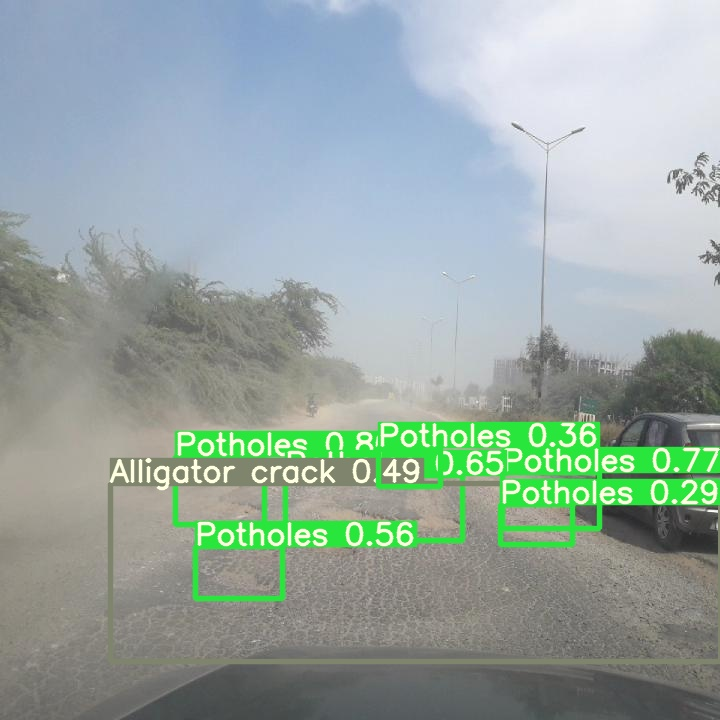

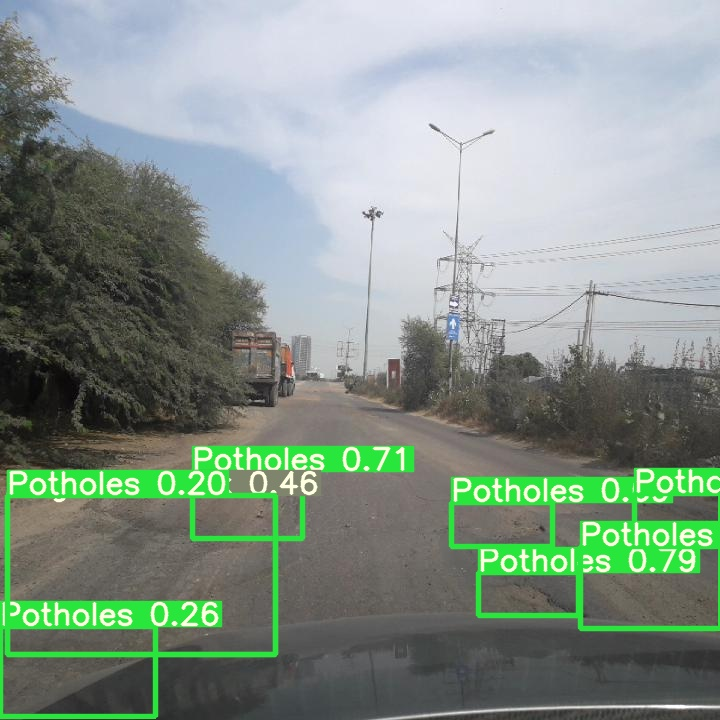

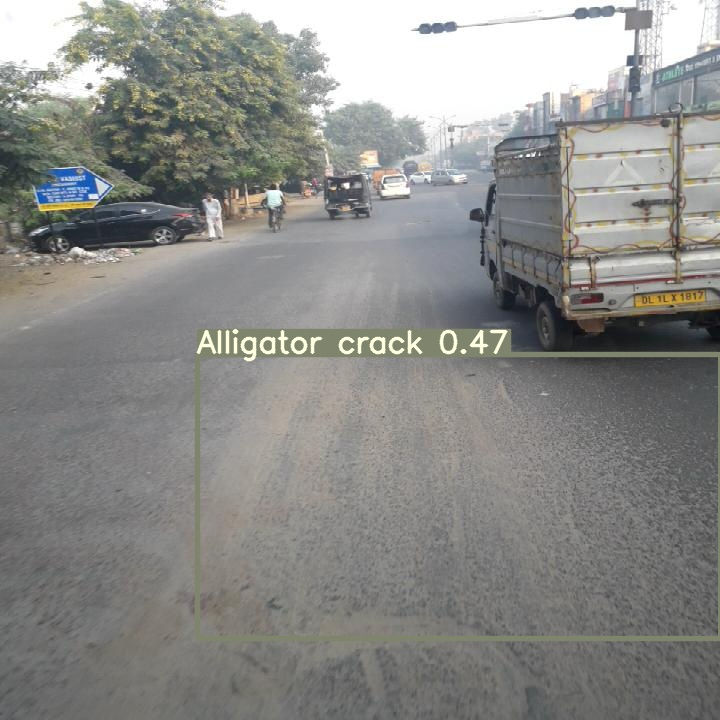



[57.78213376260699, 36.319919877546006, 18.628381708656004]


In [106]:
#display inference on ALL test images
import glob


for imageName in glob.glob('inference/output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
print(PCIvalues)


# Inference again

In [107]:
!python detect.py --weights weights/last_yolov5s_results2.pt --img 736 --save-txt --conf 0.2 --source /home/abhisht/Desktop/SIH-flask/yolov5/inference/images/testClean --output /home/abhisht/Desktop/SIH-flask/yolov5/inference/testClean_output

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.2, device='', img_size=736, iou_thres=0.5, output='/home/abhisht/Desktop/SIH-flask/yolov5/inference/testClean_output', save_txt=True, source='/home/abhisht/Desktop/SIH-flask/yolov5/inference/images/testClean', update=False, view_img=False, weights='weights/last_yolov5s_results2.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce MX150', total_memory=2002MB)

/home/abhisht/Desktop/SIH-flask/env/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/abhisht/Desktop/SIH-flask/env/lib/python3.7/site-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.co

In [108]:
PCIvalues = []
for fil in glob.glob("/home/abhisht/Desktop/SIH-flask/yolov5/inference/testClean_output" + "*.txt"):
    dict = areaPerc(fil)
    PCI = PCICalc(dict)
    PCIvalues.append(PCI)
if not PCIvalues:
    PCIvalues.append(noFaultPCI)

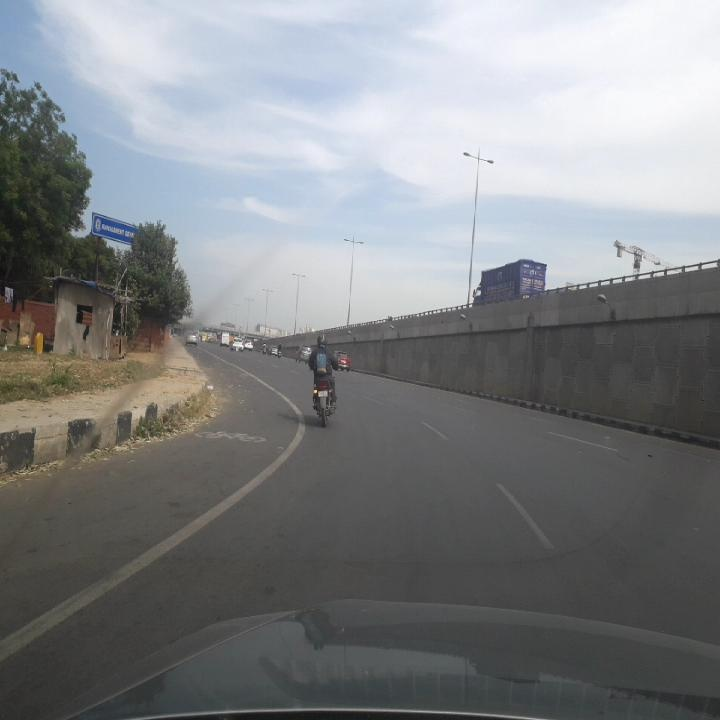



[100.0]


In [109]:
#display inference on ALL test images
import glob


for imageName in glob.glob('/home/abhisht/Desktop/SIH-flask/yolov5/inference/testClean_output/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")
print(PCIvalues)
